# Diversification with Crypto & VIX in Multi-Asset Portfolios

Including **cryptocurrencies (BTC & ETH)** and the **Volatility Index (VIX)** in a portfolio alongside equities, bonds, and global index ETFs provides an opportunity to test their diversification effectiveness.  

- **VIX** → behaves as a hedge due to negative correlation with equities.  
- **Cryptos** → add diversification due to low correlation with Indian equities but remain somewhat tied to global risk-on assets.  

---

## 📊 VIX as a Diversifier

### Why VIX Helps
- **Inverse Correlation**: VIX rises when equities fall → acts as a natural hedge.  
- **Crisis Hedge**: Provides protection in market downturns.  
- **Unique Driver**: Driven by **implied volatility**, not price direction of stocks or bonds.  

### How Exposure Works
- **Direct trading not possible** → must use VIX-linked products:  
  - VIX futures & options  
  - ETFs/ETNs tracking VIX futures  

⚠️ **Problem**: VIX ETPs decay in value over time due to **contango** (negative roll yield) → best used for short-term hedging, not long-term investing.  

### Core Relationship
- **Index Options (Parent)**: VIX index calculated from option prices (implied volatility).  
- **VIX Futures (Child)**: Contracts track expected VIX value at future dates.  

---


In [2]:
# -----------------------------
# Imports
# -----------------------------

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Dictionary of Indian market assets
assets = {
    "Reliance": "RELIANCE.NS",   # Reliance Industries
    "TCS": "TCS.NS",        # Tata Consultancy Services
    "Infosys":"INFY.NS",       # Infosys
    "HDFC Bank":"HDFCBANK.NS",   # HDFC Bank
    "ICICI Bank":"ICICIBANK.NS",  # ICICI Bank
    "Hindustan Unilver":"HINDUNILVR.NS", # Hindustan Unilever
    "Larsen&Turbo":"LT.NS",         # Larsen & Toubro
    "Axis gold ETF":"AXISGOLD.NS",   # Axis Gold ETF
    "S&P 500 ETF":"^GSPC",         # S&P 500 (international diversification)
    "Bharat 22 ETF":"ICICIB22.NS",   # BHARAT 22 ETF
    "Bharat Bond":"EBBETF0430.NS", # The Bharat Bond ETF
    "LT Govt. Bond": "LTGILTBEES.NS", # Long term govt. bonds
    "Volatility index":"^INDIAVIX", # India volatility index
    "Bitcoin": "BTC-USD", # Crypto: Bitcoin
    "Ethereum": "ETH-USD", # Crypto: Ethereum
}


for name, ticker in assets.items():
  print(f'{name:15} (has the ticker): {ticker:30}')


Reliance        (has the ticker): RELIANCE.NS                   
TCS             (has the ticker): TCS.NS                        
Infosys         (has the ticker): INFY.NS                       
HDFC Bank       (has the ticker): HDFCBANK.NS                   
ICICI Bank      (has the ticker): ICICIBANK.NS                  
Hindustan Unilver (has the ticker): HINDUNILVR.NS                 
Larsen&Turbo    (has the ticker): LT.NS                         
Axis gold ETF   (has the ticker): AXISGOLD.NS                   
S&P 500 ETF     (has the ticker): ^GSPC                         
Bharat 22 ETF   (has the ticker): ICICIB22.NS                   
Bharat Bond     (has the ticker): EBBETF0430.NS                 
LT Govt. Bond   (has the ticker): LTGILTBEES.NS                 
Volatility index (has the ticker): ^INDIAVIX                     
Bitcoin         (has the ticker): BTC-USD                       
Ethereum        (has the ticker): ETH-USD                       


### Assets price trend and correlation analysis

/tmp/ipython-input-1836489757.py:40: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(norm_df.index, norm_df[col], label=col, linewidth=2)
/tmp/ipython-input-1836489757.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


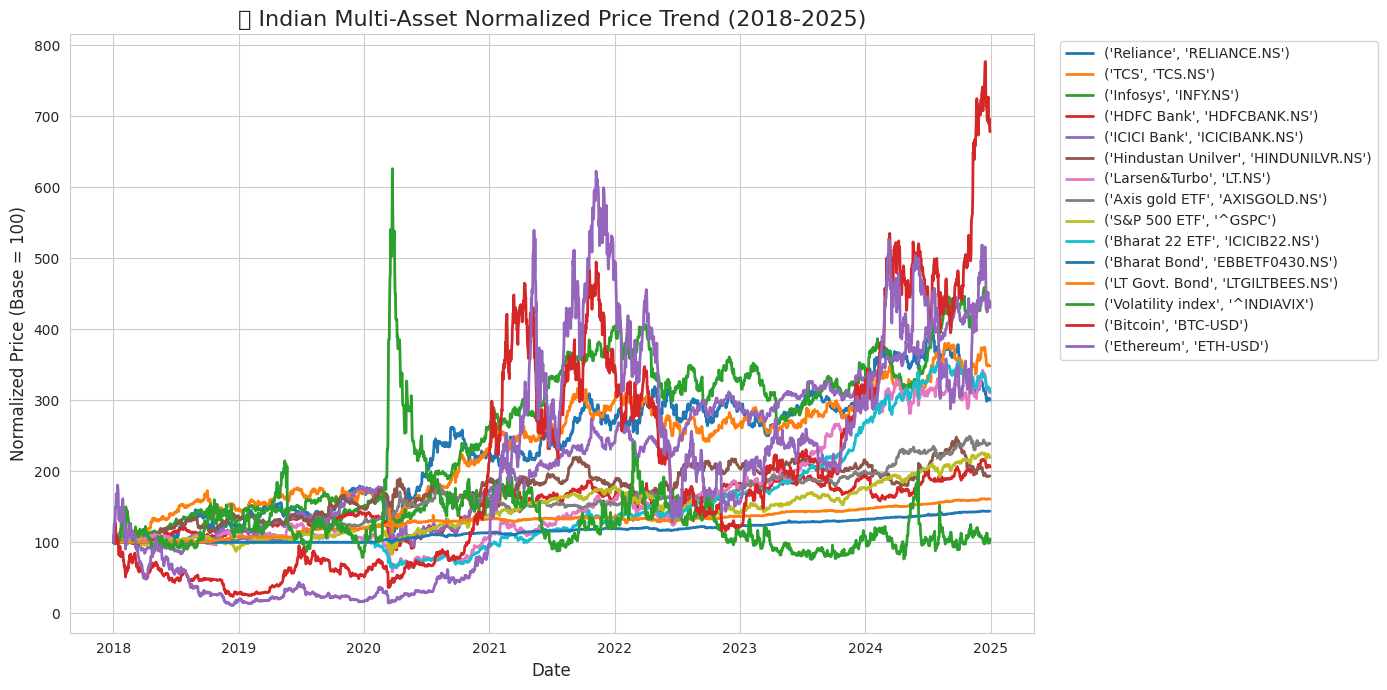

/tmp/ipython-input-1836489757.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = price_df.pct_change().resample('M').sum() * 100  # monthly %


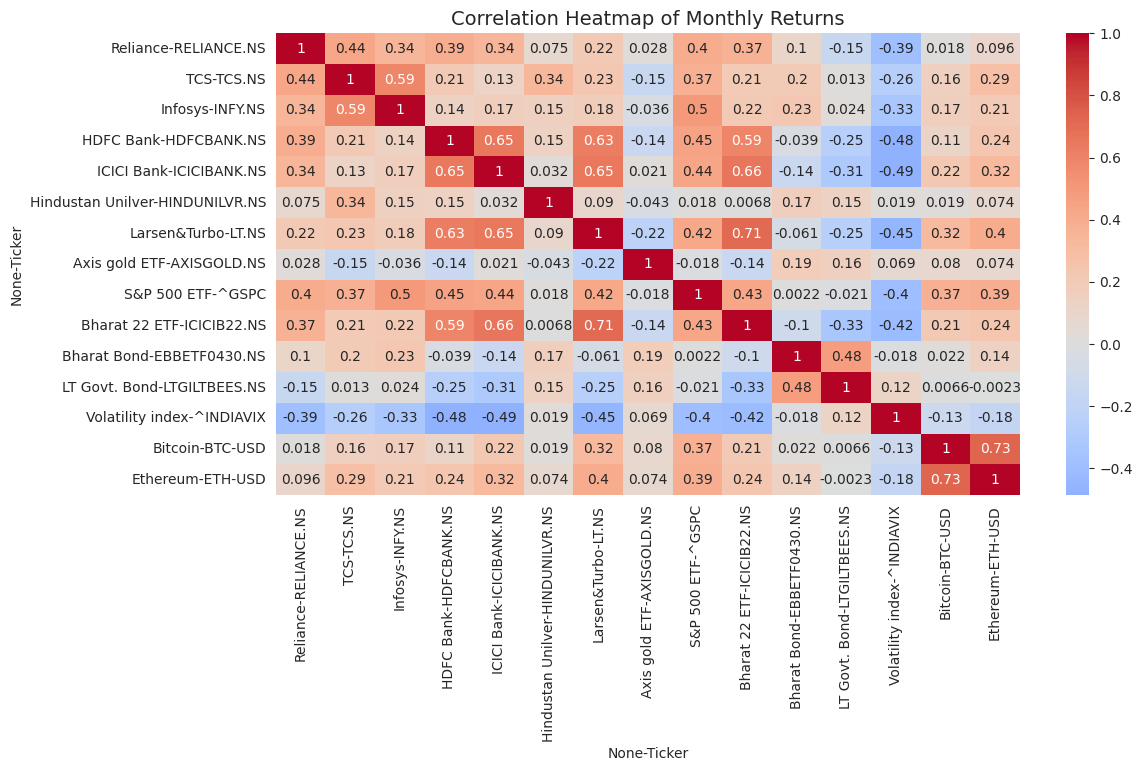

In [4]:

# -----------------------------
# Assets to Analyze
# -----------------------------
#assets = assets

start_date = '2018-01-01'
end_date = '2024-12-31'

# -----------------------------
# Download Data
# -----------------------------
series_dict = {}
for name, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=False)
    if not df.empty and 'Adj Close' in df.columns:
        series_dict[name] = df['Adj Close']
    else:
        print(f"⚠️ Skipped {name} ({ticker}) - no data returned")

# -----------------------------
# Build Price DataFrame
# -----------------------------
if not series_dict:
    raise ValueError("No valid data downloaded. Please check tickers.")

price_df = pd.concat(series_dict, axis=1)
price_df = price_df.ffill().bfill()  # fill gaps due to holiday mismatches


# Normalize (Base = 100)
norm_df = price_df / price_df.iloc[0] * 100

# -----------------------------
# Static Plot
# -----------------------------
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

for col in norm_df.columns:
    plt.plot(norm_df.index, norm_df[col], label=col, linewidth=2)

plt.title('📊 Indian Multi-Asset Normalized Price Trend (2018-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base = 100)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# -----------------------------
# Correlation Heatmap (Monthly Returns)
# -----------------------------
returns = price_df.pct_change().resample('M').sum() * 100  # monthly %
plt.figure(figsize=(12, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Monthly Returns", fontsize=14)
plt.show()

---

## 📌 Hedging Properties of VIX

- **Equities**:  
  - Reliance: -0.39  
  - HDFC Bank: -0.47  
  - ICICI Bank: -0.49  
  - S&P 500: -0.40  

- **Crypto**:  
  - BTC: -0.13  
  - ETH: -0.18  

- **Safe Assets**:  
  - Bonds & Gold → near zero correlation  

✅ **Conclusion**: VIX provides **true crisis protection** → strong hedge in downturns.  

---

In [5]:
# -----------------------------
# Diversification vs Concentration (Improved)
# -----------------------------
import pandas as pd

# Use log returns (more robust than pct_change for correlations)
returns = price_df.resample("ME").last().pct_change().dropna()

# Correlation matrix
corr_matrix = returns.corr()

# Compute average correlation for each asset (excluding self)
avg_corr = corr_matrix.apply(lambda row: row.drop(row.name).mean(), axis=1)

# Build results table
diversification_stats = pd.DataFrame({
    "Symbol": avg_corr.index,
    "Avg Correlation": avg_corr.values
})

# Classification based on thresholds
def classify_corr(x):
    if x < 0.3:
        return "Diversifier"
    elif x > 0.7:
        return "Concentration Risk"
    else:
        return "Moderate"

diversification_stats["Risk Type"] = diversification_stats["Avg Correlation"].apply(classify_corr)

# Sort by lowest correlation (best diversifiers at top)
diversification_stats = diversification_stats.sort_values("Avg Correlation").reset_index(drop=True)

print("\n=== ⚖️ Diversification vs Concentration ===")
print(diversification_stats)



=== ⚖️ Diversification vs Concentration ===
                                Symbol  Avg Correlation    Risk Type
0        (Volatility index, ^INDIAVIX)        -0.252723  Diversifier
1         (Axis gold ETF, AXISGOLD.NS)        -0.010189  Diversifier
2       (LT Govt. Bond, LTGILTBEES.NS)         0.032493  Diversifier
3         (Bharat Bond, EBBETF0430.NS)         0.089314  Diversifier
4   (Hindustan Unilver, HINDUNILVR.NS)         0.095922  Diversifier
5              (Reliance, RELIANCE.NS)         0.174223  Diversifier
6                   (Infosys, INFY.NS)         0.185733  Diversifier
7                   (Bitcoin, BTC-USD)         0.195800  Diversifier
8                        (TCS, TCS.NS)         0.201429  Diversifier
9           (ICICI Bank, ICICIBANK.NS)         0.203851  Diversifier
10            (HDFC Bank, HDFCBANK.NS)         0.207174  Diversifier
11        (Bharat 22 ETF, ICICIB22.NS)         0.210213  Diversifier
12                 (Ethereum, ETH-USD)         0.221405  D


## 🔎 Bitcoin (BTC) Correlation Analysis

- **With Indian Equities**: Low to modest positive (0.1–0.3).  
- **With S&P 500 ETF**: 0.37 → partially linked to global equities.  
- **With Gold/Bonds**: Very low (0.02–0.08).  
- **With VIX**: -0.13 → small hedge effect.  
- **With ETH**: 0.73 → strong overlap with Ethereum.  

✅ **Conclusion**:  
- BTC adds **moderate diversification** vs. Indian equities.  
- Still tied to **global risk-on cycles**.  
- Helps reduce **domestic concentration risk**, but not a pure hedge.  

---

## 🔎 Ethereum (ETH) Correlation Analysis

- **With Indian Equities**: Slightly higher than BTC (0.2–0.3).  
- **With S&P 500**: 0.39 → closer link than BTC.  
- **With Bonds/Gold**: Near zero.  
- **With VIX**: -0.18 → better hedge than BTC.  
- **With BTC**: 0.73 → strong concentration risk.  

✅ **Conclusion**:  
- ETH behaves similarly to BTC but is **slightly more global equity-linked**.  
- Adding ETH + BTC together → increases **concentration within crypto**.  
- Still diversifies Indian equities somewhat.  


## 🧾 Code Output Explanation (Stats Interpretation)

1. **Correlation Values**  
   - +1 → moves together (no diversification).  
   - 0 → independent (best diversifier).  
   - -1 → moves opposite (strong hedge).  

2. **Risk Classification**  
   - **Diversifier (<0.3)** → adds value.  
   - **Moderate (0.3–0.7)** → partial link.  
   - **Concentration Risk (>0.7)** → moves closely with portfolio.  

3. **Portfolio Definitions**  
   - **Indian_Equities** → Reliance, TCS, Infosys, HDFC, ICICI.  
   - **Indian_Equities_Bonds_ETF** → adds local bonds & Bharat 22 ETF.  
   - **Full_Global** → includes gold ETF & S&P 500 exposure.  

4. **Ranking**  
   - Lower average correlation → **better diversifier**.  
   - VIX ranks **best hedge**, BTC/ETH → **moderate diversifiers**.  


### Portfolio level diversification analysis

The analysis of correlation by taking average correlation with all the assets shows all the securities as diversifiers, constructing portfolio level correlation to check the diversification effect

In [13]:
# -----------------------------
# Diversification vs Concentration by Portfolio + Summary Ranking
# -----------------------------
import pandas as pd

# Flatten MultiIndex columns (use only tickers)
#price_df.columns = price_df.columns.get_level_values(1)

# Monthly returns
returns = price_df.resample("M").last().pct_change().dropna()

# Define portfolio groups
portfolios = {
    "Indian_Equities": ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS",
                        "ICICIBANK.NS", "HINDUNILVR.NS", "LT.NS"],

    "Indian_Equities_Bonds_ETF": ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS",
                                  "ICICIBANK.NS", "HINDUNILVR.NS", "LT.NS",
                                  "ICICIB22.NS", "EBBETF0430.NS", "LTGILTBEES.NS"],

    "Full_Global": ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS",
                    "ICICIBANK.NS", "HINDUNILVR.NS", "LT.NS",
                    "ICICIB22.NS", "EBBETF0430.NS", "LTGILTBEES.NS",
                    "^GSPC", "AXISGOLD.NS"]
}

# Equal-weighted portfolio returns
portfolio_returns = pd.DataFrame({
    name: returns[assets].mean(axis=1)
    for name, assets in portfolios.items()
})

# Correlation of each asset with each portfolio
results = {col: returns.corrwith(portfolio_returns[col]) for col in portfolio_returns.columns}
diversification_stats = pd.DataFrame(results)

# Classification function
def classify_corr(x):
    if x < 0.3:
        return "Diversifier"
    elif x > 0.7:
        return "Concentration Risk"
    else:
        return "Moderate"

# Add classification columns
for col in diversification_stats.columns:
    diversification_stats[f"{col}_Type"] = diversification_stats[col].apply(classify_corr)

print("\n=== ⚖️ Diversification vs Concentration by Portfolio ===")
#print(diversification_stats)

# -----------------------------
# 📊 Summary Ranking (BTC, ETH, VIX)
# -----------------------------
focus_assets = ["BTC-USD", "ETH-USD", "^INDIAVIX"]

summary = diversification_stats.loc[focus_assets, portfolios.keys()]

# Calculate average correlation across all portfolios
summary["Avg Corr Across Portfolios"] = summary.mean(axis=1)

# Classification based on avg correlation
summary["Overall Risk Type"] = summary["Avg Corr Across Portfolios"].apply(classify_corr)

# Rank (lower correlation = better diversification)
summary = summary.sort_values("Avg Corr Across Portfolios").reset_index()
summary.rename(columns={"index": "Asset"}, inplace=True)

print("\n=== 📊 Summary Diversification Ranking (BTC, ETH, VIX) ===")
#print(summary)

# -----------------------------
# 🧠 Explanation of Stats
# -----------------------------
explanation = """
How to read the stats:

1. Correlation Values:
   - Between -1 and +1.
   - +1 = moves exactly with the portfolio (no diversification).
   - 0 = moves independently (best diversifier).
   - -1 = moves opposite (strong hedge).

2. Risk Type Classification:
   - Diversifier (< 0.3) → asset adds diversification value.
   - Moderate (0.3–0.7) → partial diversification, still linked to portfolio.
   - Concentration Risk (> 0.7) → asset moves closely with portfolio.

3. Portfolio Definitions:
   - Indian_Equities: Core Indian stocks only.
   - Indian_Equities_Bonds_ETF: Adds local bonds & Bharat 22 ETF.
   - Full_Global: Adds gold ETF & S&P 500 exposure.

4. Summary Ranking:
   - Shows BTC, ETH, VIX correlation vs. all three portfolios.
   - Lower average correlation = stronger diversifier.
   - Useful for quickly spotting which asset provides the best hedge.
"""
print(explanation)



=== ⚖️ Diversification vs Concentration by Portfolio ===

=== 📊 Summary Diversification Ranking (BTC, ETH, VIX) ===

How to read the stats:

1. Correlation Values:
   - Between -1 and +1.
   - +1 = moves exactly with the portfolio (no diversification).
   - 0 = moves independently (best diversifier).
   - -1 = moves opposite (strong hedge).

2. Risk Type Classification:
   - Diversifier (< 0.3) → asset adds diversification value.
   - Moderate (0.3–0.7) → partial diversification, still linked to portfolio.
   - Concentration Risk (> 0.7) → asset moves closely with portfolio.

3. Portfolio Definitions:
   - Indian_Equities: Core Indian stocks only.
   - Indian_Equities_Bonds_ETF: Adds local bonds & Bharat 22 ETF.
   - Full_Global: Adds gold ETF & S&P 500 exposure.

4. Summary Ranking:
   - Shows BTC, ETH, VIX correlation vs. all three portfolios.
   - Lower average correlation = stronger diversifier.
   - Useful for quickly spotting which asset provides the best hedge.



/tmp/ipython-input-498216300.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = price_df.resample("M").last().pct_change().dropna()


#### The Diversification stats for each constituent vs Portfolio

In [14]:
diversification_stats

,Indian_Equities,Indian_Equities_Bonds_ETF,Full_Global,Indian_Equities_Type,Indian_Equities_Bonds_ETF_Type,Full_Global_Type
Ticker,,,,,,
RELIANCE.NS,0.662597,0.647432,0.652518,Moderate,Moderate,Moderate
TCS.NS,0.633450,0.604925,0.588912,Moderate,Moderate,Moderate
INFY.NS,0.569422,0.550556,0.567058,Moderate,Moderate,Moderate
HDFCBANK.NS,0.722875,0.731160,0.720187,Concentration Risk,Concentration Risk,Concentration Risk
ICICIBANK.NS,0.690280,0.707379,0.712583,Moderate,Concentration Risk,Concentration Risk
HINDUNILVR.NS,0.399431,0.366820,0.335546,Moderate,Moderate,Moderate
LT.NS,0.689656,0.721219,0.700269,Moderate,Concentration Risk,Concentration Risk
AXISGOLD.NS,-0.107141,-0.108478,-0.005471,Diversifier,Diversifier,Diversifier
^GSPC,0.615121,0.620465,0.696815,Moderate,Moderate,Moderate


The Debt securities instruments in the equities + bond portfolio, the two other debt oriented instruments come out as concentration risk, hence out of following:

*Bharat 22 ETF   (has the ticker): ICICIB22.NS                   
Bharat Bond     (has the ticker): EBBETF0430.NS                 
LT Govt. Bond   (has the ticker): LTGILTBEES.NS*

**Bharat Bond** would would be sufficient to capture the diversification of Debt instrument given its risk and return profile, however based on necessity can assign weights to other two securities, Bharat 22 ETF and LT Govt. Bond, as needed based on investment strategy.

### Summary of VIX and cryptos

In [15]:
summary

,Ticker,Indian_Equities,Indian_Equities_Bonds_ETF,Full_Global,Avg Corr Across Portfolios,Overall Risk Type
0,^INDIAVIX,-0.568297,-0.573164,-0.571538,-0.571000,Diversifier
1,BTC-USD,0.314740,0.317929,0.351273,0.327981,Moderate
2,ETH-USD,0.371027,0.372913,0.401905,0.381949,Moderate


# Typical Asset Allocation Principles

Below is an illustrative breakdown of asset classes, their **probable allocation ranges**, and the **rationale** for including them in a portfolio.  

| Asset Class      | Probable Weight Range | Rationale |
|------------------|-----------------------|-----------|
| **Nifty 50 Equities** | 30% – 60% | The core growth engine of an India-focused portfolio. Allocation depends on risk appetite (higher for aggressive investors). |
| **Debt Assets**  | 30% – 60% | Provides stability and diversification against equity volatility. Could include government bonds, corporate bonds, or high-quality debt funds. |
| **Cryptocurrency** | 1% – 5% | Highly volatile and speculative. Low-correlation asset for small, high-risk/high-reward exposure. Indian context requires very low weight due to regulatory clarity & volatility. |
| **VIX Futures**  | 0% – 5% | Tail-risk hedge against sharp equity downturns (negative correlation with Nifty 50). Non-yielding/negative-yielding due to contango → allocation kept small and tactical. |


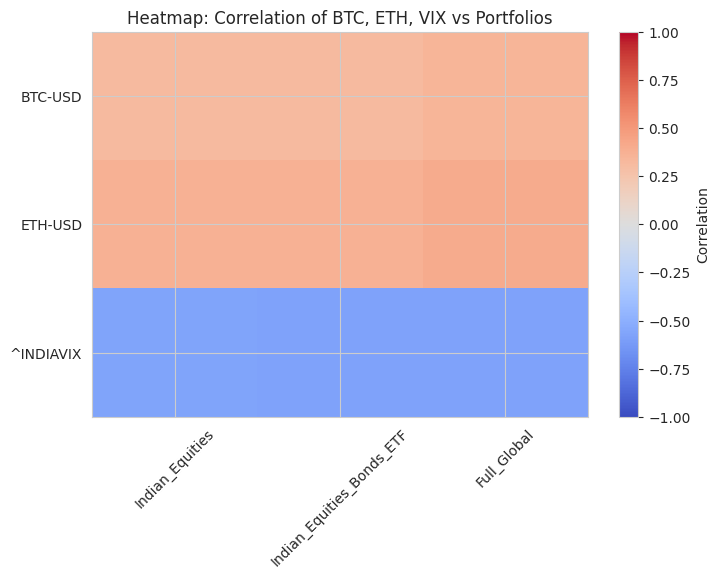

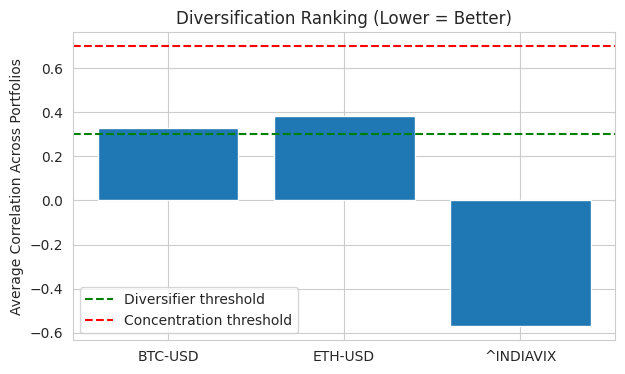


=== 📊 Diversification Summary ===
           Indian_Equities  Indian_Equities_Bonds_ETF  Full_Global  \
Ticker                                                               
BTC-USD           0.314740                   0.317929     0.351273   
ETH-USD           0.371027                   0.372913     0.401905   
^INDIAVIX        -0.568297                  -0.573164    -0.571538   

           Avg Corr Across Portfolios Overall Risk Type  
Ticker                                                   
BTC-USD                      0.327981          Moderate  
ETH-USD                      0.381949          Moderate  
^INDIAVIX                   -0.571000       Diversifier  


In [7]:
# -----------------------------
# Diversification Visuals: Heatmap + Bar Chart
# -----------------------------
import matplotlib.pyplot as plt

# Focus only on BTC, ETH, VIX correlations
focus_assets = ["BTC-USD", "ETH-USD", "^INDIAVIX"]
summary = diversification_stats.loc[focus_assets, portfolios.keys()]

# Add average correlation & classification
summary["Avg Corr Across Portfolios"] = summary.mean(axis=1)
summary["Overall Risk Type"] = summary["Avg Corr Across Portfolios"].apply(classify_corr)

# ✅ Heatmap
plt.figure(figsize=(8,5))
plt.imshow(summary[portfolios.keys()], cmap="coolwarm", aspect="auto", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(portfolios)), portfolios.keys(), rotation=45)
plt.yticks(range(len(summary)), summary.index)
plt.title("Heatmap: Correlation of BTC, ETH, VIX vs Portfolios")
plt.show()

# ✅ Bar chart ranking
plt.figure(figsize=(7,4))
plt.bar(summary.index, summary["Avg Corr Across Portfolios"])
plt.axhline(0.3, color="green", linestyle="--", label="Diversifier threshold")
plt.axhline(0.7, color="red", linestyle="--", label="Concentration threshold")
plt.title("Diversification Ranking (Lower = Better)")
plt.ylabel("Average Correlation Across Portfolios")
plt.legend()
plt.show()

print("\n=== 📊 Diversification Summary ===")
print(summary)



## 📌 Final Takeaways

- **BTC & ETH**  
  - Moderate diversification vs. Indian equities.  
  - Linked with global equities → weak in global downturns.  
  - High overlap with each other (0.73 correlation).  

- **VIX**  
  - Strong **negative correlation** with equities.  
  - True **crisis hedge** and best defensive tool.  
  - Uncorrelated with bonds/gold → unique diversification.  

👉 **Summary**:  
- **BTC/ETH** → diversification (but overlap & global equity linkage).  
- **VIX** → diversification + hedge (best defensive asset in this mix).  


### Assigning weights based on broad asset class weights in portfolio

As the equity exposure lowers the weight of VIX allocation will become lower

In [16]:
# -----------------------------
# Dynamic Allocation Suggestions
# -----------------------------

# Example base portfolio weights (user can adjust):
# equity_weight = fraction of portfolio in equities
# bond_weight   = fraction in bonds/ETFs
# gold_weight   = fraction in gold/alt
equity_weight = 0.65   # 65% equities
bond_weight   = 0.25   # 25% bonds
gold_weight   = 0.10   # 10% alternatives

def dynamic_allocation(risk_type, equity_weight):
    if risk_type == "Diversifier":
        # Scale hedge to equity exposure (max 20%)
        alloc = min(0.20, equity_weight * 0.15)
        return f"{alloc:.1%} suggested (hedge / stabilizer)"
    elif risk_type == "Moderate":
        # Scale moderate diversifier to equity (max ~7%)
        alloc = min(0.07, equity_weight * 0.05)
        return f"{alloc:.1%} suggested (growth diversifier)"
    else:  # Concentration Risk
        return "0-2% suggested (limit exposure)"

# Apply to BTC, ETH, VIX
allocation_dynamic = summary.copy()
allocation_dynamic["Dynamic Allocation"] = allocation_dynamic["Overall Risk Type"].apply(
    lambda x: dynamic_allocation(x, equity_weight)
)

print("\n=== 💡 Dynamic Allocation Suggestions (Based on Portfolio Weights) ===")
allocation_dynamic[["Avg Corr Across Portfolios", "Overall Risk Type", "Dynamic Allocation"]]



=== 💡 Dynamic Allocation Suggestions (Based on Portfolio Weights) ===


,Avg Corr Across Portfolios,Overall Risk Type,Dynamic Allocation
0,-0.571000,Diversifier,9.8% suggested (hedge / stabilizer)
1,0.327981,Moderate,3.2% suggested (growth diversifier)
2,0.381949,Moderate,3.2% suggested (growth diversifier)


### Selection and weights of VIX proxy for hedging

Making the VIX proxy split customizable.

Which allows to decide whether to hedge with more Gold, more Govt Bonds, or more Corporate Bonds.

✅ Benefits

**Can tune the hedge profile:**

More Gold → better for global crisis hedge.

More Govt Bonds → better for India-specific risk-off.

More Bharat Bond ETF → adds stability + income.

Still keeps BTC & ETH allocations intact.

In [9]:
allocation_dynamic.reset_index(inplace=True)

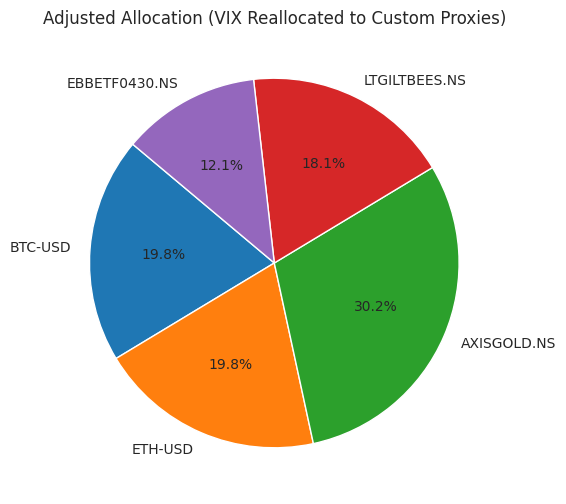


=== 💡 Adjusted Allocation (BTC, ETH + VIX Proxies) ===
BTC-USD: 3.2%
ETH-USD: 3.2%
AXISGOLD.NS: 4.9%
LTGILTBEES.NS: 2.9%
EBBETF0430.NS: 2.0%


In [10]:
# -----------------------------
# Customizable VIX Proxy Hedge Split
# -----------------------------

# Define proxies for VIX hedge
vix_proxies = {
    "AXISGOLD.NS": 0.5,       # 50% Gold ETF
    "LTGILTBEES.NS": 0.3,     # 30% Long-term Govt Bond ETF
    "EBBETF0430.NS": 0.2      # 20% Bharat Bond ETF
}

# Check split sums to 1
if abs(sum(vix_proxies.values()) - 1.0) > 1e-6:
    raise ValueError("VIX proxy weights must sum to 1.0")

# Convert % string to float
def extract_percentage(text):
    if isinstance(text, str) and "%" in text:
        return float(text.split("%")[0]) / 100
    elif isinstance(text, (int, float)):
        return float(text)
    else:
        return 0.0

# Get VIX allocation
vix_alloc_row = allocation_dynamic.loc[allocation_dynamic["Ticker"] == "^INDIAVIX", "Dynamic Allocation"]
vix_alloc_value = extract_percentage(vix_alloc_row.values[0]) if not vix_alloc_row.empty else 0.0

# Allocate according to custom weights
proxy_allocation = {proxy: vix_alloc_value * weight for proxy, weight in vix_proxies.items()}

# Get BTC and ETH allocations
btc_alloc_row = allocation_dynamic.loc[allocation_dynamic["Ticker"] == "BTC-USD", "Dynamic Allocation"]
eth_alloc_row = allocation_dynamic.loc[allocation_dynamic["Ticker"] == "ETH-USD", "Dynamic Allocation"]

btc_alloc = extract_percentage(btc_alloc_row.values[0]) if not btc_alloc_row.empty else 0.0
eth_alloc = extract_percentage(eth_alloc_row.values[0]) if not eth_alloc_row.empty else 0.0

# Build adjusted allocation dict
adjusted_alloc = {
    "BTC-USD": btc_alloc,
    "ETH-USD": eth_alloc,
    **proxy_allocation
}

# ✅ Pie chart with adjusted allocations
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(adjusted_alloc.values(), labels=adjusted_alloc.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Adjusted Allocation (VIX Reallocated to Custom Proxies)")
plt.show()

print("\n=== 💡 Adjusted Allocation (BTC, ETH + VIX Proxies) ===")
for k,v in adjusted_alloc.items():
    print(f"{k}: {v:.1%}")


The weights of gold and debt securities is spread of VIX weight into those assets which will increase the weights if already existing in the portfolio as part of investment else will be added as an asset if already not existing. Which will be a conservative approach taking the Debt portion higher in times of crises which will be a defensive strategy.

### How to execute the hedge strategy

🔹 1.  NSE VIX Futures were proposed, but liquidity is low.

No liquid India VIX ETF exists yet.

Proxy hedge → Short Nifty futures / buy Nifty put options. These rise when India VIX spikes.

🔹 2. Alternative “Volatility Hedges”

Long Gold ETF (AXISGOLD.NS) → safe-haven hedge in stress scenarios.

US Treasuries or Indian Govt. Bonds (LTGILTBEES.NS, EBBETF0430.NS) → tend to gain in risk-off events.

Tail-risk strategies: buying out-of-money index puts.